In [10]:
import pandas as pd
df=pd.read_csv('merged.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,day_of_week,month,week,year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20.0,3,1,1,2015,0,0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30.0,3,1,1,2015,0,0
2,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40.0,3,1,1,2015,0,0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10.0,3,1,1,2015,0,0
4,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,100.0,3,1,1,2015,0,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 

c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


Final MAPE: 19.50%


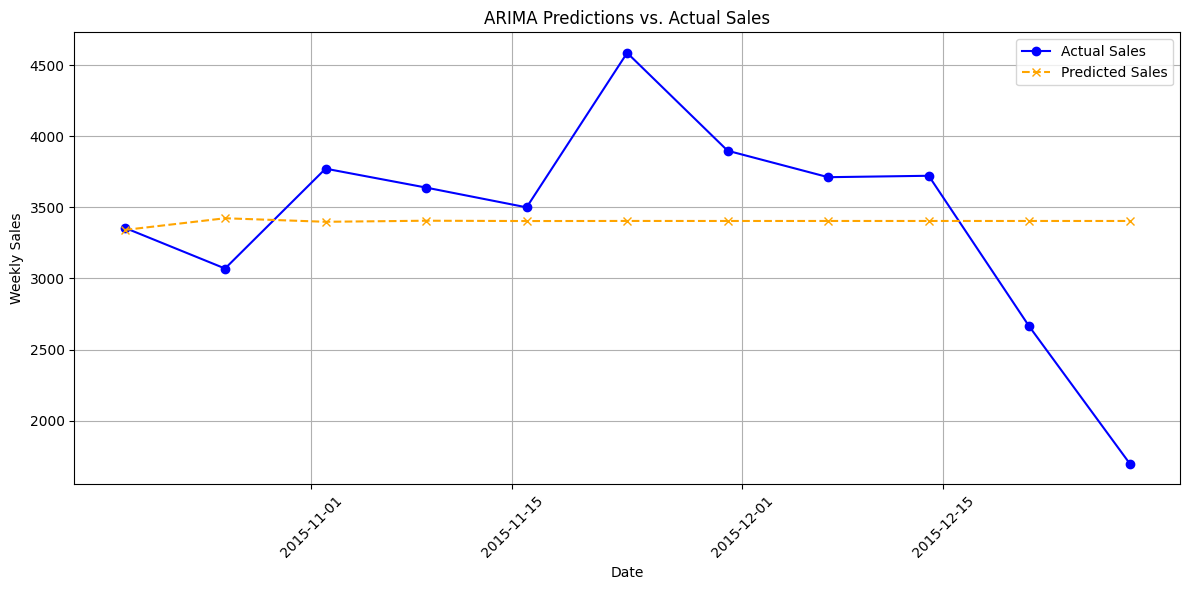

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Prepare weekly sales data
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales


pizza_sales_weekly = prepare_weekly_sales(df)

# Train-test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# MAPE function
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_indices = actual != 0  # Avoid division by zero
    return np.mean(np.abs((actual[non_zero_indices] - predicted[non_zero_indices]) / actual[non_zero_indices])) * 100

# Fit a simple ARIMA model (use default parameters p=1, d=1, q=1)
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Forecasting
arima_predictions = fitted_model.forecast(steps=len(test))

# Format predictions for display
arima_predictions = pd.Series(arima_predictions, index=test.index)

# Calculate MAPE on the test set
final_mape = mape(test.values, arima_predictions.values)
print(f"Final MAPE: {final_mape:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(arima_predictions.index, arima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All para

Final MAPE: 25.68%


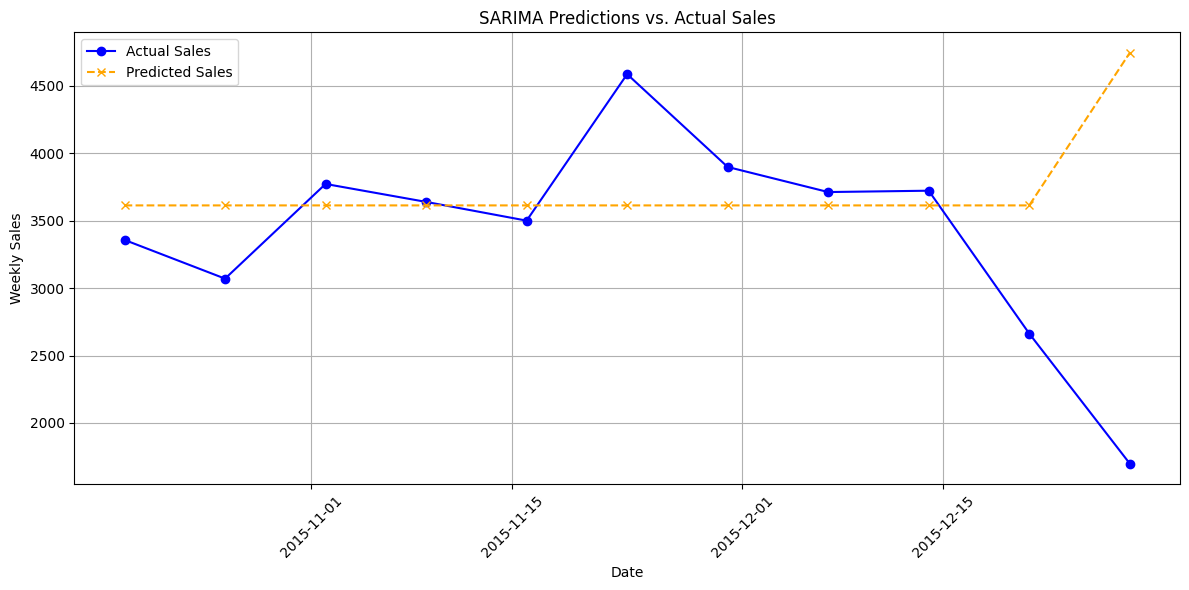

In [13]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Function to prepare weekly sales
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(df)

# Train-test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Simple SARIMA model (you can adjust the parameters as needed)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_model = model.fit(disp=False)

# Forecast for test period
sarima_predictions = sarima_model.forecast(steps=len(test))

# Calculate MAPE function
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_indices = actual != 0  # Avoid division by zero
    return np.mean(np.abs((actual[non_zero_indices] - predicted[non_zero_indices]) / actual[non_zero_indices])) * 100

# Calculate MAPE on the test set
final_mape = mape(test.values, sarima_predictions.values)
print(f"Final MAPE: {final_mape:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(test.index, sarima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [14]:
daily_sales = df.groupby('order_date')['quantity'].sum().reset_index()
# daily_sales.set_index('order_date', inplace=True)
daily_sales

,order_date,quantity
0,2015-01-01,613
1,2015-01-02,626
2,2015-01-03,610
3,2015-01-04,413
4,2015-01-05,482
...,...,...
353,2015-12-27,346
354,2015-12-28,378
355,2015-12-29,302
356,2015-12-30,327


c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
11:08:23 - cmdstanpy - INFO - Chain [1] start processing
11:08:23 - cmdstanpy - INFO - Chain [1] done processing


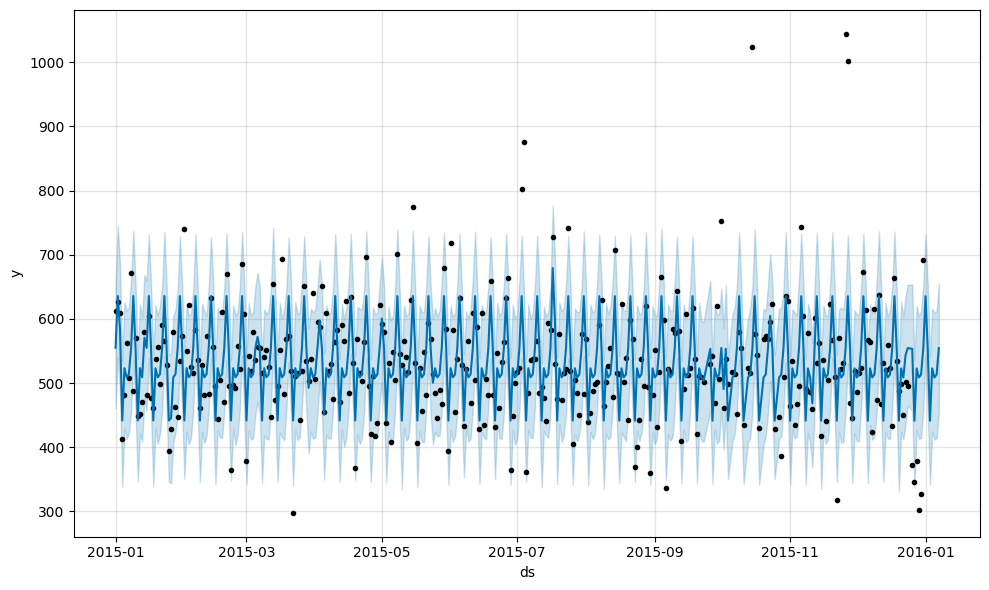

In [15]:
from prophet import Prophet

daily_sales['order_date'] = pd.to_datetime(daily_sales['order_date'])

# renameing the columns to 'ds' for dates and 'y' for the target values
prophet_data = daily_sales.rename(columns={'order_date': 'ds', 'quantity': 'y'})

# Model fiting
prophet_model = Prophet()
prophet_model.add_country_holidays(country_name='IN')
prophet_model.fit(prophet_data)

# Future forecast for the next 7 days
future_dates = prophet_model.make_future_dataframe(periods=7)
prophet_forecast = prophet_model.predict(future_dates)

# Displaying the forecast
fig = prophet_model.plot(prophet_forecast)

11:08:31 - cmdstanpy - INFO - Chain [1] start processing
11:08:31 - cmdstanpy - INFO - Chain [1] done processing


Best Prophet Model MAPE: 19.5853


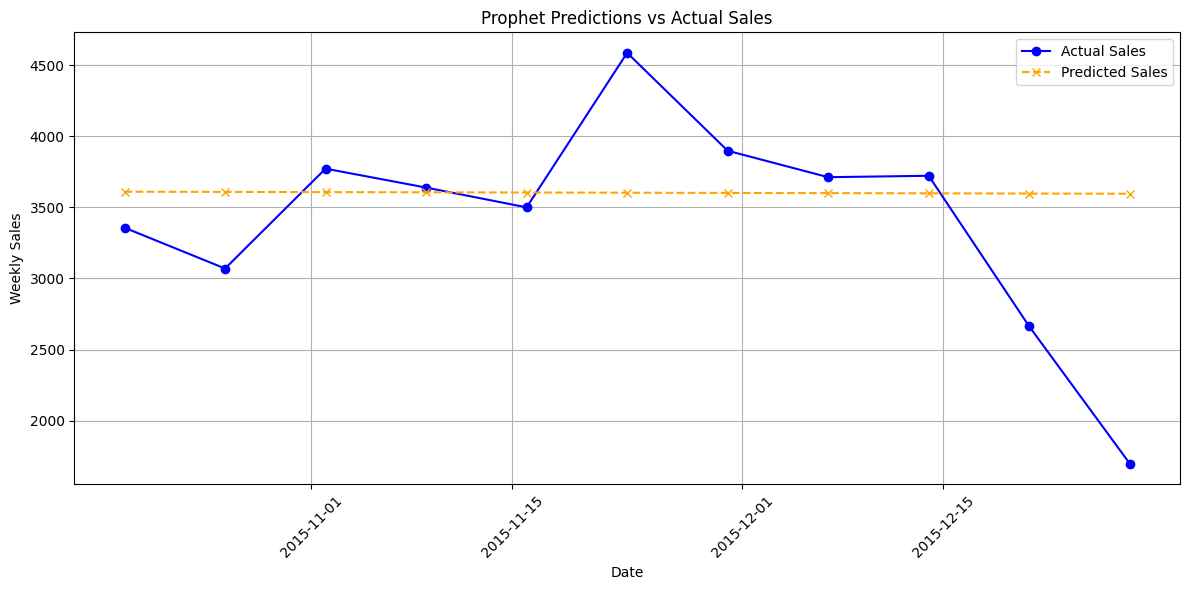

In [16]:
def prepare_weekly_sales_for_prophet(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for the target variable
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales_for_prophet(df)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]




# Best Prophet Model Training and Output
def best_prophet_model(train, test):
    model = Prophet()
    model.fit(train)
    
    future = model.make_future_dataframe(periods=len(test), freq='W')
    forecast = model.predict(future)
    predictions = forecast['yhat'][-len(test):].values
    prophet_mape = mape(test['y'].values, predictions)
    
    print(f"Best Prophet Model MAPE: {prophet_mape:.4f}")
    return predictions, prophet_mape

def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_indices = actual != 0  # Avoid division by zero
    return np.mean(np.abs((actual[non_zero_indices] - predicted[non_zero_indices]) / actual[non_zero_indices])) * 100

# Train and evaluate the Prophet model
prophet_predictions, prophet_mape_score = best_prophet_model(train, test)

# Formating the predictions for display
prophet_predictions = pd.Series(prophet_predictions, index=test['ds'])



# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales', color='blue', marker='o')
plt.plot(prophet_predictions.index, prophet_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Prophet Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Epoch [0/50], Loss: 0.6752
Epoch [10/50], Loss: 0.2862
Epoch [20/50], Loss: 0.0182
Epoch [30/50], Loss: 0.0067
Epoch [40/50], Loss: 0.0114
Final MAPE: 22.94%


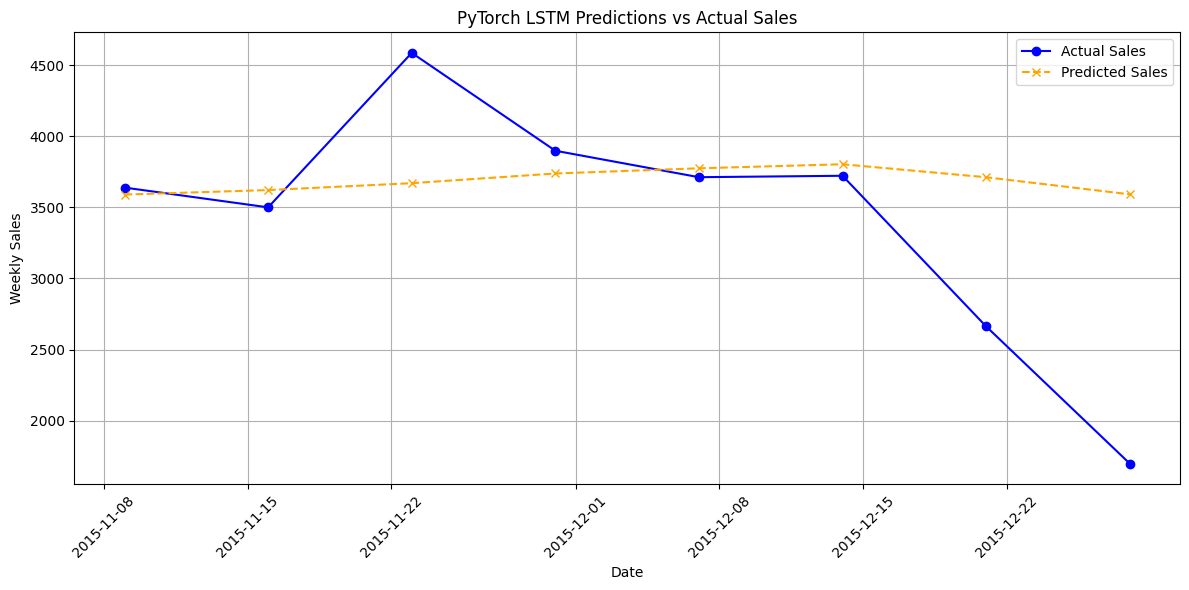

In [17]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Function to prepare weekly sales data
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

# Assuming 'df' is already loaded with your data
pizza_sales_weekly = prepare_weekly_sales(df)

# Train-test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['quantity']])
test_scaled = scaler.transform(test[['quantity']])

# Preparing data for LSTM (PyTorch version)
def create_lstm_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 3
X_train, y_train = create_lstm_dataset(train_scaled, time_steps)
X_test, y_test = create_lstm_dataset(test_scaled, time_steps)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Reshape X for LSTM input (PyTorch expects [batch_size, sequence_length, features])
X_train = X_train.view(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.view(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model in PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        predictions = self.fc(lstm_out[:, -1, :])
        return predictions

# Initialize the model
model = LSTMModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the LSTM model
def train_lstm_model(X_train, y_train, model, criterion, optimizer, epochs=50, batch_size=32):
    # Create DataLoader for batching
    dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            predictions = model(batch_X)

            # Compute the loss
            loss = criterion(predictions, batch_y.view(-1, 1))

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Train the model
train_lstm_model(X_train, y_train, model, criterion, optimizer, epochs=50, batch_size=32)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predictions = predictions.numpy()
    predictions_rescaled = scaler.inverse_transform(predictions)

# Rescale the y_test values
y_test_rescaled = scaler.inverse_transform(y_test.view(-1, 1))

# Calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_indices = actual != 0  # Avoid division by zero
    return np.mean(np.abs((actual[non_zero_indices] - predicted[non_zero_indices]) / actual[non_zero_indices])) * 100

final_mape = mape(y_test_rescaled, predictions_rescaled)
print(f"Final MAPE: {final_mape:.2f}%")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'][time_steps:], y_test_rescaled, label='Actual Sales', color='blue', marker='o')
plt.plot(test['order_date'][time_steps:], predictions_rescaled, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('PyTorch LSTM Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Best Regression Model MAPE: 19.0869


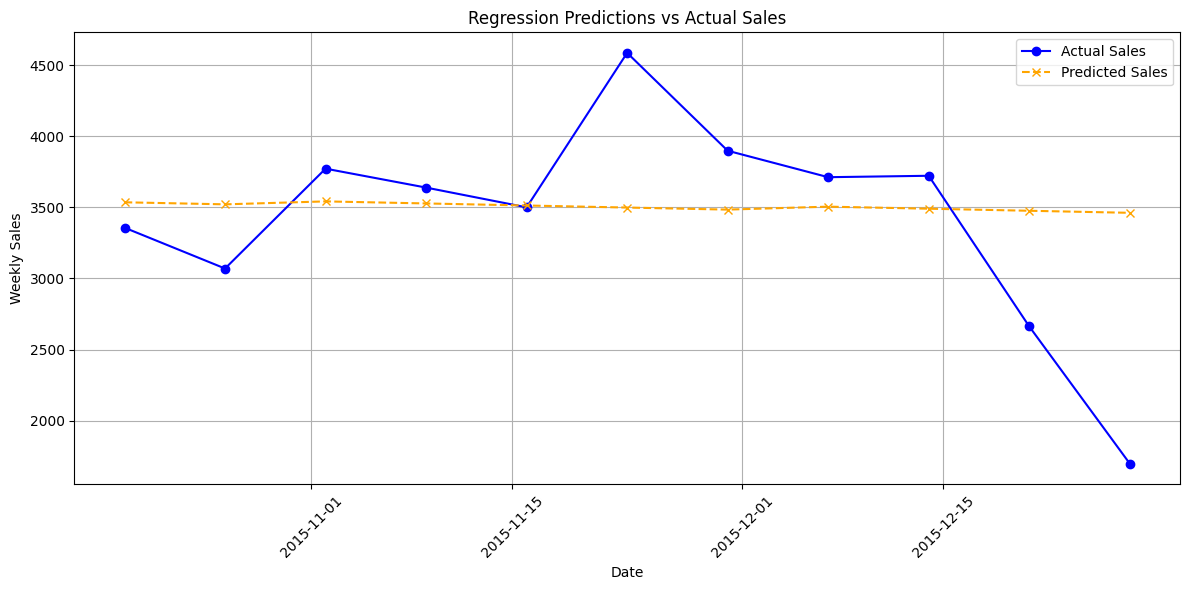

In [18]:
from sklearn.linear_model import LinearRegression
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

# Feature Engineering for Regression
def create_regression_features(df):
    df['week_of_year'] = df['order_date'].dt.isocalendar().week
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    df['year'] = df['order_date'].dt.year
    return df

pizza_sales_weekly = prepare_weekly_sales(df)
pizza_sales_weekly = create_regression_features(pizza_sales_weekly)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Prepareing data for Regression
X_train = train[['week_of_year', 'day_of_week', 'month', 'year']]
y_train = train['quantity']
X_test = test[['week_of_year', 'day_of_week', 'month', 'year']]
y_test = test['quantity']

# Best Regression Model Training and Output
def best_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    regression_mape = mape(y_test, predictions)
    
    print(f"Best Regression Model MAPE: {regression_mape:.4f}")
    return predictions, regression_mape

# Train and evaluate the Regression model
regression_predictions, regression_mape_score = best_regression_model(X_train, y_train, X_test, y_test)

# Formating the predictions for display
regression_predictions = pd.Series(regression_predictions, index=test['order_date'])




# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(regression_predictions.index, regression_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Regression Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
# Aggregateing pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.set_index('week', inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(df)

# Function to forecast for each pizza type
def forecast_sales_per_pizza_type(pizza_type, train, periods=1):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)
    
    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1):
    pizza_type_forecasts = {}
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = pizza_sales_weekly_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]
        
        # train test data
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        if forecast:
            pizza_type_forecasts[pizza_type] = forecast[0]  # Access the first value of the forecast list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast = int(forecast)
    next_week_pizza_sales_forecasts[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

# Displaying the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rs\App

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 82 pizzas
bbq_ckn_m: 94 pizzas
bbq_ckn_s: 39 pizzas
big_meat_s: 97 pizzas
brie_carre_s: 56 pizzas
calabrese_m: 40 pizzas
calabrese_s: 6 pizzas
cali_ckn_l: 83 pizzas
cali_ckn_m: 56 pizzas
cali_ckn_s: 37 pizzas
ckn_alfredo_l: 9 pizzas
ckn_alfredo_m: 58 pizzas
ckn_alfredo_s: 11 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 14 pizzas
ckn_pesto_s: 14 pizzas
classic_dlx_l: 19 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 39 pizzas
five_cheese_l: 55 pizzas
four_cheese_l: 150 pizzas
four_cheese_m: 44 pizzas
green_garden_l: 2 pizzas
green_garden_m: 28 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 47 pizzas
hawaiian_m: 13 pizzas
hawaiian_s: 46 pizzas
ital_cpcllo_l: 60 pizzas
ital_cpcllo_m: 37 pizzas
ital_cpcllo_s: 26 pizzas
ital_supr_l: 61 pizzas
ital_supr_m: 49 pizzas
ital_supr_s: 3 pizzas
ital_veggie_l: 16 pizzas
ital_veggie_m: 25 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 37 pizzas
mediterraneo_m: 29 pizzas
mediterraneo_s: 1

c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rs\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it

In [20]:
import joblib

joblib.dump(sarima_model, 'sarima.pkl') 
print("Model saved")

Model saved


In [21]:
loaded_model = joblib.load('sarima.pkl')
print("Model loaded successfully")

Model loaded successfully


In [22]:
model_filename = 'sarima.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = joblib.load(file)

# Forecasting function
def forecast_sales(loaded_model, periods):
    forecast = loaded_model.predict(n_periods=periods)
    return forecast

forecasted_sales = forecast_sales(loaded_model, periods=7)
print(forecasted_sales)

2014-12-29       0.0
2015-01-05    2262.0
2015-01-12    3730.0
2015-01-19    3525.0
2015-01-26    3670.0
2015-02-02    3767.0
2015-02-09    3791.0
2015-02-16    3752.0
2015-02-23    3562.0
2015-03-02    3742.0
2015-03-09    3804.0
2015-03-16    3688.0
2015-03-23    3687.0
2015-03-30    3678.0
2015-04-06    3977.0
2015-04-13    3752.0
2015-04-20    3800.0
2015-04-27    3766.0
2015-05-04    3599.0
2015-05-11    3767.0
2015-05-18    3965.0
2015-05-25    3686.0
2015-06-01    3546.0
2015-06-08    3887.0
2015-06-15    3685.0
2015-06-22    3602.0
2015-06-29    3767.0
2015-07-06    4031.0
2015-07-13    3639.0
2015-07-20    3827.0
2015-07-27    3752.0
2015-08-03    3506.0
2015-08-10    3627.0
2015-08-17    3798.0
2015-08-24    3642.0
2015-08-31    3350.0
2015-09-07    3580.0
2015-09-14    3836.0
2015-09-21    3710.0
2015-09-28    2595.0
2015-10-05    3847.0
2015-10-12    3052.0
Freq: W-MON, Name: predicted_mean, dtype: float64


In [23]:
ingredient=pd.read_csv('ingredient.csv')

In [24]:
ingredient_predicted = ingredient.copy()
ingredient_predicted['predicted_quantity'] = ingredient_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts)
ingredient_predicted['total_ingredient_qty'] = ingredient_predicted['Items_Qty_In_Grams'] * ingredient_predicted['predicted_quantity']

# Sum of the quantities for each ingredient
ingredient_totals = ingredient_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()
print("Total quantity of predicted ingredients for the following week:")
print(ingredient_totals)
ingredient_predicted

Total quantity of predicted ingredients for the following week:
{'?duja Salami': 2380.0, 'Alfredo Sauce': 1160.0, 'Anchovies': 2790.0, 'Artichokes': 9350.0, 'Arugula': 760.0, 'Asiago Cheese': 5830.0, 'Bacon': 25980.0, 'Barbecue Sauce': 2365.0, 'Barbecued Chicken': 6880.0, 'Beef Chuck Roast': 11430.0, 'Blue Cheese': 1650.0, 'Brie Carre Cheese': 1680.0, 'Calabrese Salami': 14200.0, 'Capocollo': 57850.0, 'Caramelized Onions': 1120.0, 'Chicken': 77600.0, 'Chipotle Sauce': 7180.0, 'Chorizo Sausage': 4850.0, 'Cilantro': 3590.0, 'Coarse Sicilian Salami': 12560.0, 'Corn': 23970.0, 'Eggplant': 2280.0, 'Feta Cheese': 10430.0, 'Fontina Cheese': 5160.0, 'Friggitello Peppers': 595.0, 'Garlic': 23035.0, 'Genoa Salami': 8010.0, 'Goat Cheese': 12120.0, 'Gorgonzola Piccante Cheese': 6880.0, 'Gouda Cheese': 3980.0, 'Green Olives': 4520.0, 'Green Peppers': 6480.0, 'Italian Sausage': 970.0, 'Jalapeno Peppers': 5580.0, 'Kalamata Olives': 3285.0, 'Luganega Sausage': 6280.0, 'Mozzarella Cheese': 11650.0, 'Mu

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,82,3280.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,82,1230.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,82,1640.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,82,2460.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,82,4920.0
...,...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,40,800.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,40,800.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,40,400.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,40,600.0


In [25]:
ingredient_totals

{'?duja Salami': 2380.0,
 'Alfredo Sauce': 1160.0,
 'Anchovies': 2790.0,
 'Artichokes': 9350.0,
 'Arugula': 760.0,
 'Asiago Cheese': 5830.0,
 'Bacon': 25980.0,
 'Barbecue Sauce': 2365.0,
 'Barbecued Chicken': 6880.0,
 'Beef Chuck Roast': 11430.0,
 'Blue Cheese': 1650.0,
 'Brie Carre Cheese': 1680.0,
 'Calabrese Salami': 14200.0,
 'Capocollo': 57850.0,
 'Caramelized Onions': 1120.0,
 'Chicken': 77600.0,
 'Chipotle Sauce': 7180.0,
 'Chorizo Sausage': 4850.0,
 'Cilantro': 3590.0,
 'Coarse Sicilian Salami': 12560.0,
 'Corn': 23970.0,
 'Eggplant': 2280.0,
 'Feta Cheese': 10430.0,
 'Fontina Cheese': 5160.0,
 'Friggitello Peppers': 595.0,
 'Garlic': 23035.0,
 'Genoa Salami': 8010.0,
 'Goat Cheese': 12120.0,
 'Gorgonzola Piccante Cheese': 6880.0,
 'Gouda Cheese': 3980.0,
 'Green Olives': 4520.0,
 'Green Peppers': 6480.0,
 'Italian Sausage': 970.0,
 'Jalapeno Peppers': 5580.0,
 'Kalamata Olives': 3285.0,
 'Luganega Sausage': 6280.0,
 'Mozzarella Cheese': 11650.0,
 'Mushrooms': 23000.0,
 'Onions

<Figure size 1200x800 with 0 Axes>

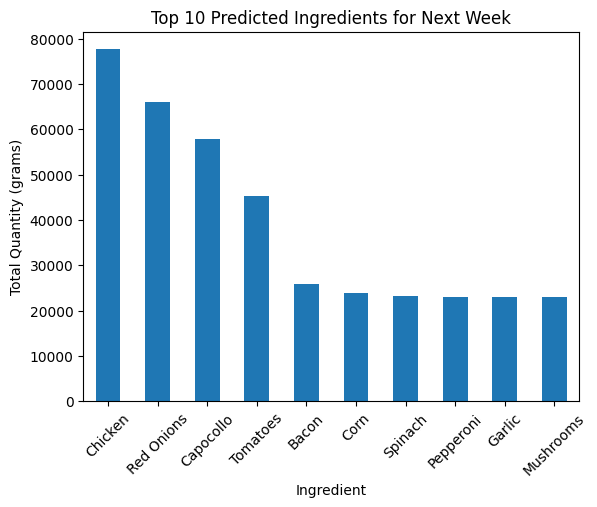

In [ ]:
# Visualizing the total quantities of ingredients
import matplotlib.pyplot as plt
import pandas as pd

ingredient_totals_df = pd.DataFrame(list(ingredient_totals.items()), columns=['Ingredient', 'Total Quantity (grams)'])

plt.figure(figsize=(12, 8))
ingredient_totals_df.nlargest(10, 'Total Quantity (grams)').plot(kind='bar', x='Ingredient', y='Total Quantity (grams)', legend=False)
plt.title('Top 10 Predicted Ingredients for Next Week')
plt.ylabel('Total Quantity (grams)')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [27]:
ingredient_totals = pd.DataFrame(ingredient_totals.items(), columns=['Ingredient', 'Total Quantity (grams)'])
ingredient_totals.to_csv('predicted_ingredient_totals.csv', index=False)
print("Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'")

Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'


In [28]:
ingredient_totals

,Ingredient,Total Quantity (grams)
0,?duja Salami,2380.0
1,Alfredo Sauce,1160.0
2,Anchovies,2790.0
3,Artichokes,9350.0
4,Arugula,760.0
...,...,...
59,Sun-dried Tomatoes,1415.0
60,Thai Sweet Chilli Sauce,4180.0
61,Thyme,280.0
62,Tomatoes,45360.0
